#Introduction

A Portuguese bank has asked us to look into their current users information to 
utitilze is so that they can maximize the number of long-term account it opens with existing clients and new customers. We will be perform Exploratory Data Analysis first on the dataset, convert the dataset so that there are dummy variables before we input it into the modelling. We have gone with Logistic Regression, kNN and Decision Tree to see which model best fits the problem.

#Data

##Imports

This section is simply used to import the libraries necessary to determine the model of the problem. As well as importing the dataset that Bob has provided us with.

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
from pandas import DataFrame
from IPython.display import HTML

In [3]:
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [0]:
bank_data=pd.read_csv('/content/Drive/My Drive/bank-additional-full.csv',sep=";",low_memory=False)

##Exploratory Data Analysis

###Information about the data

Now that the data has been imported into the notebook, we will now be performing exploratory data analysis on it.

In [5]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
bank_data.shape

(41188, 21)

In [7]:
print('Null values in dataset are',len(bank_data[bank_data.isnull().any(1)]))

Null values in dataset are 0


In [8]:
bank_data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data_dup = bank_data[bank_data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
bank_data = bank_data.drop_duplicates()
bank_data.shape

(41176, 21)

###Univariate Analysis

####Output y

Has the client subscribed a term deposit?


In [12]:
bank_data["y"].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [13]:
bank_data['y'].value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

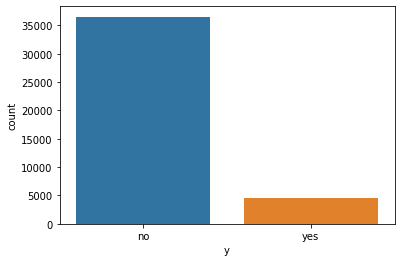

In [14]:
sb.countplot(x='y',data=bank_data)
plt.show()

#### Functions

In [0]:
def bar_graph(column):
  plt.figure(figsize=(12,8))
  ax=sb.countplot(bank_data[column], data=bank_data)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  for p in ax.patches:
    x=(p.get_height()/len(bank_data[column]))*100
    ax.annotate((round(x,2)), (p.get_x(), p.get_height()))
  plt.xlabel(column)
  plt.ylabel('Fequency of subscribers or non subscribers')
  return

In [0]:
def compare_bar_graph(column):
  plt.figure(figsize=(12,8))
  ax=sb.countplot(x=column, data=bank_data, hue="y")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  for p in ax.patches:
    x=(p.get_height()/len(bank_data[column]))*100
    ax.annotate(round(x,2), (p.get_x(), p.get_height()))

  plt.show()
  return

In [0]:
def continous_graph(column):
  fig, axs = plt.subplots(1,2,figsize=(12,8))
  sb.boxplot(data=bank_data, x='y',y=column,ax=axs[0])
  sb.distplot(bank_data.loc[bank_data['y']=='yes',column],bins=10, label='yes', ax=axs[1])
  sb.distplot(bank_data.loc[bank_data['y']=='no',column],bins=10, label='no',ax=axs[1])
  return

#### Job

In [18]:
bank_data["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

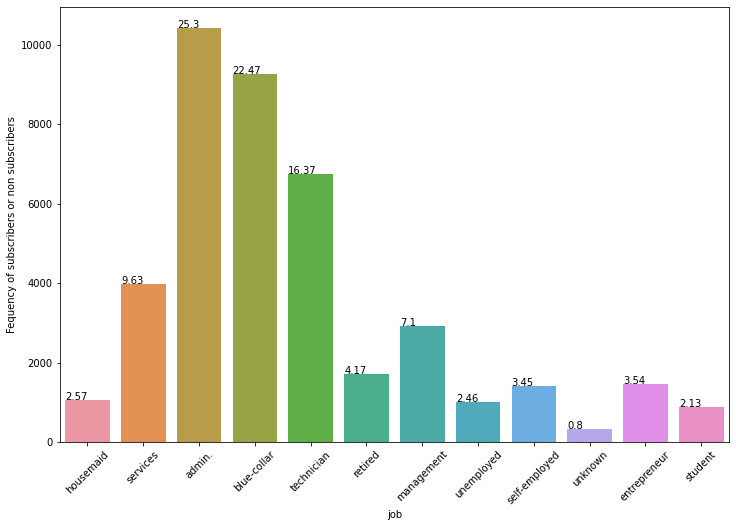

In [19]:
bar_graph('job')

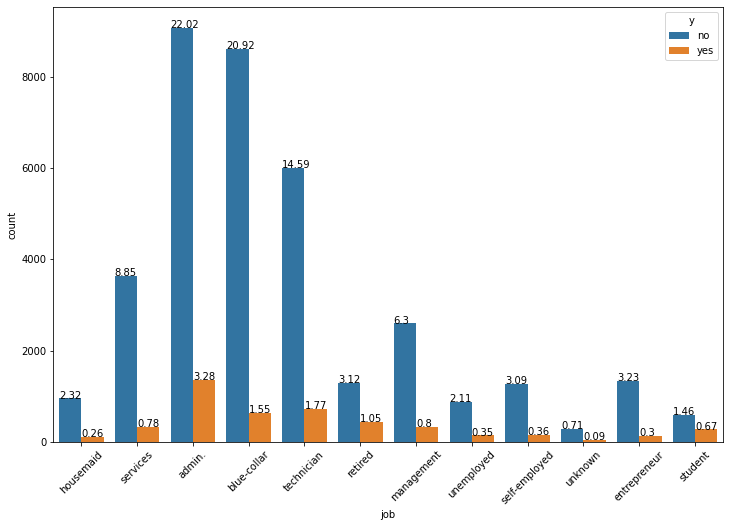

In [20]:
compare_bar_graph('job')

####Marital

In [21]:
bank_data["marital"].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

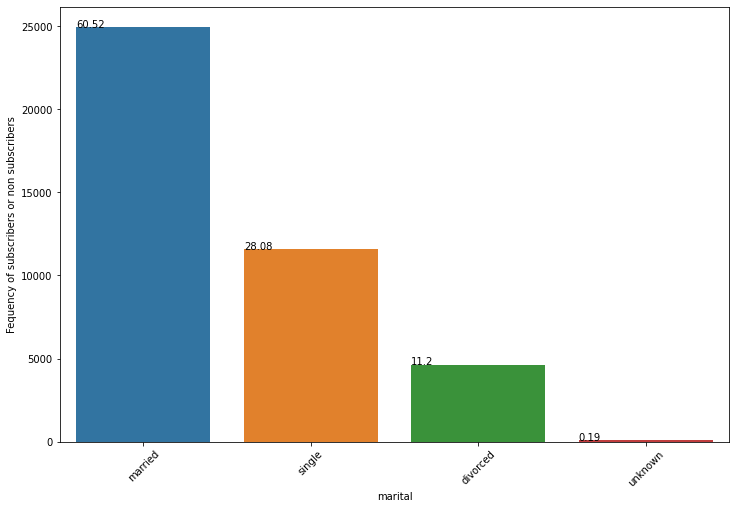

In [22]:
bar_graph('marital')

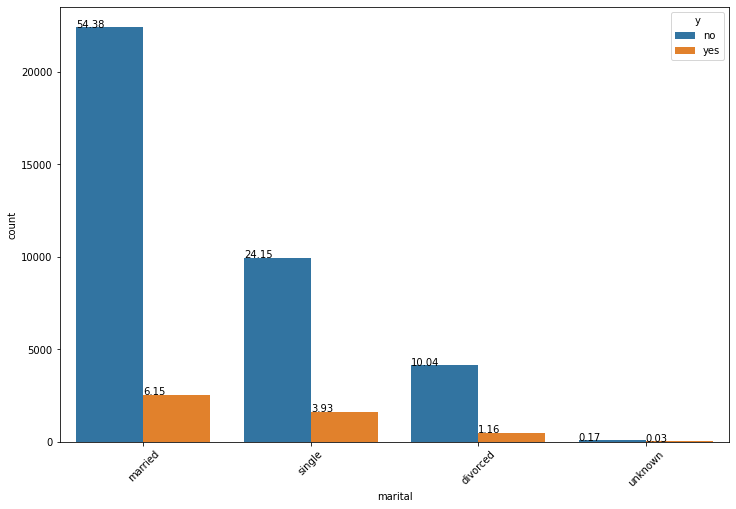

In [23]:
compare_bar_graph('marital')

####Education

In [24]:
bank_data["education"].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

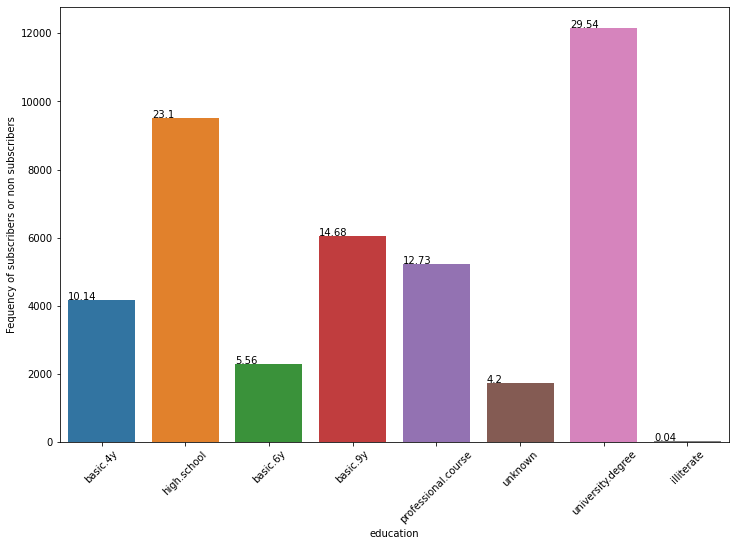

In [25]:
bar_graph('education')

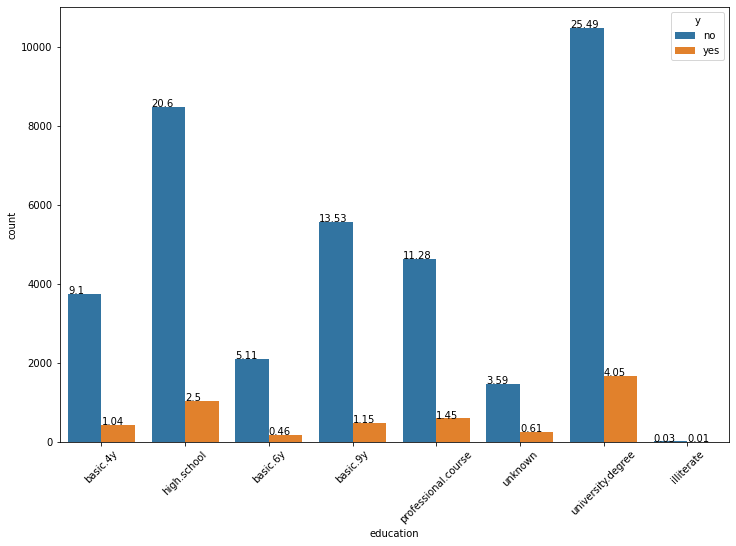

In [26]:
compare_bar_graph('education')

####Housing

In [27]:
bank_data["housing"].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

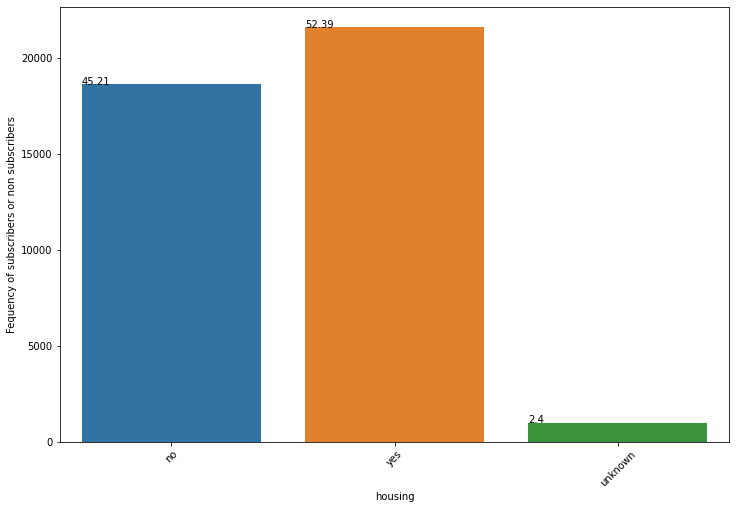

In [28]:
bar_graph('housing')

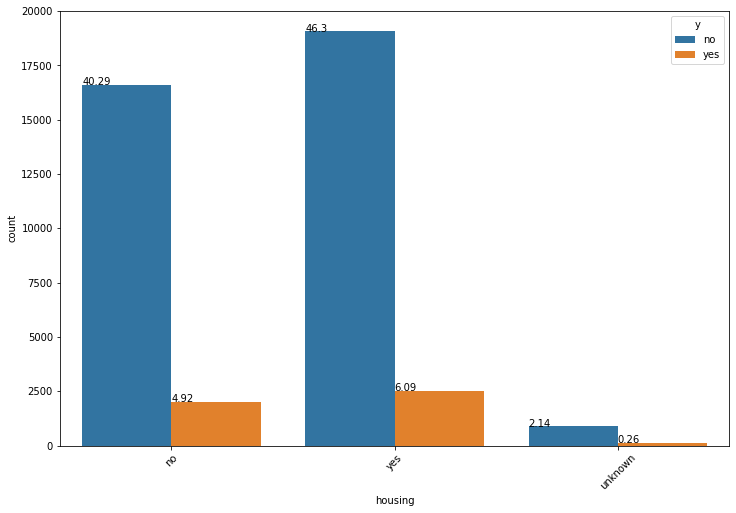

In [29]:
compare_bar_graph('housing')

####Loan

In [30]:
bank_data["loan"].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

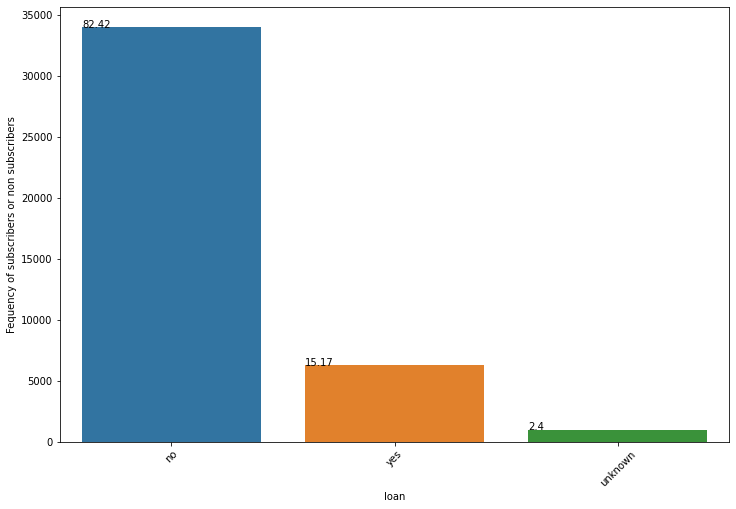

In [31]:
bar_graph('loan')

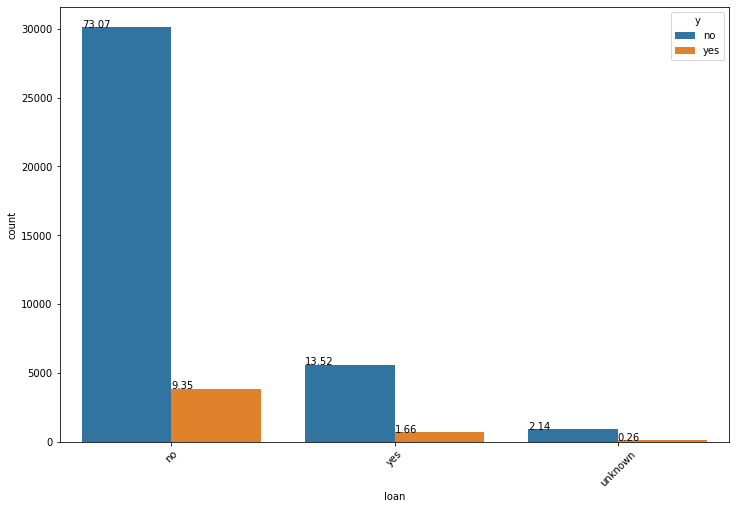

In [32]:
compare_bar_graph('loan')

####Contact

In [33]:
bank_data["contact"].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

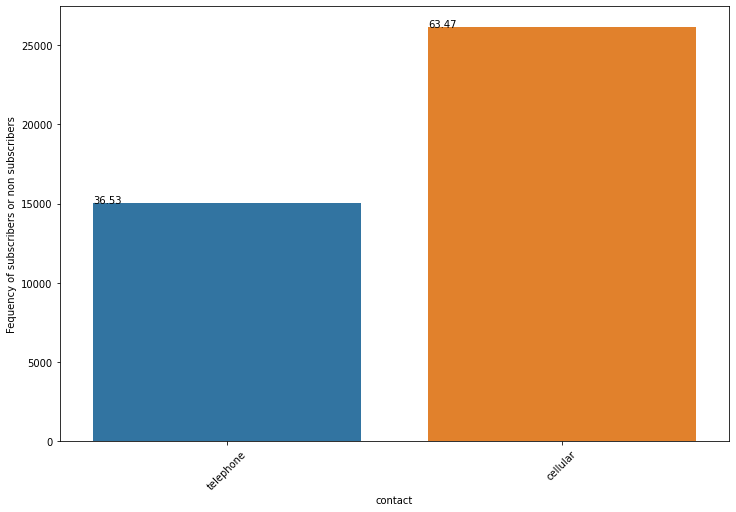

In [34]:
bar_graph('contact')

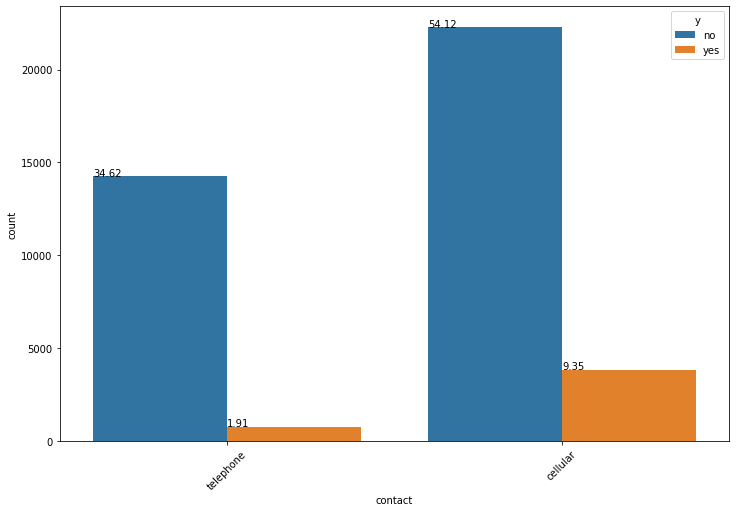

In [35]:
compare_bar_graph('contact')

####Month

In [36]:
bank_data["month"].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

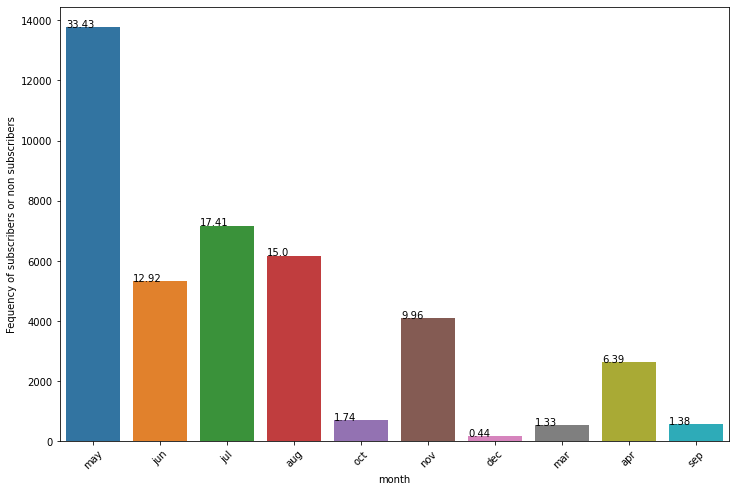

In [37]:
bar_graph('month')

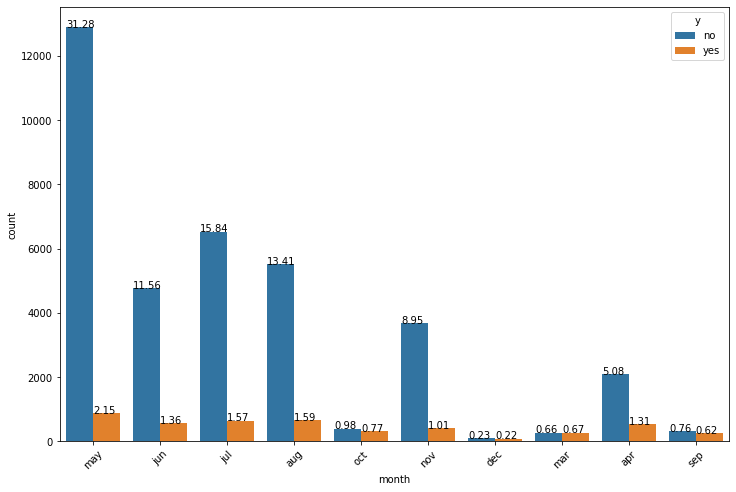

In [38]:
compare_bar_graph('month')

####Day of Week

In [39]:
bank_data["day_of_week"].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

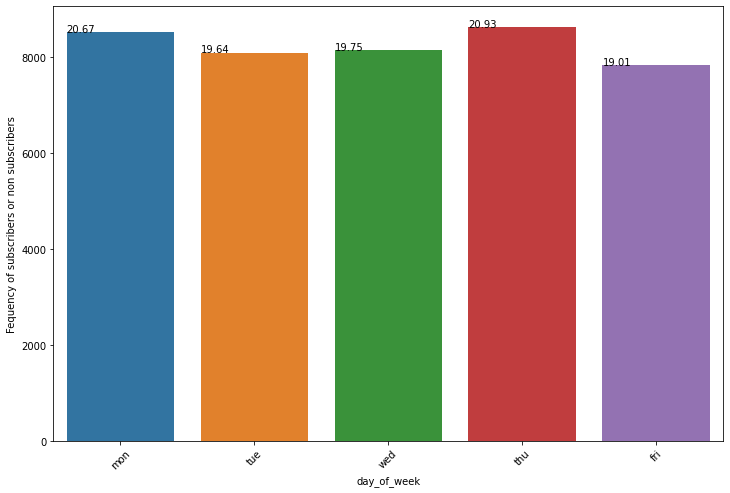

In [40]:
bar_graph('day_of_week')

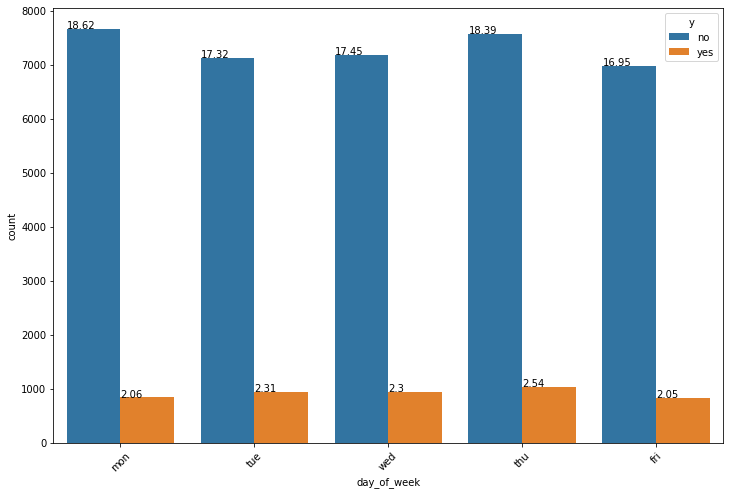

In [41]:
compare_bar_graph('day_of_week')

####Poutcome

In [42]:
bank_data["poutcome"].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

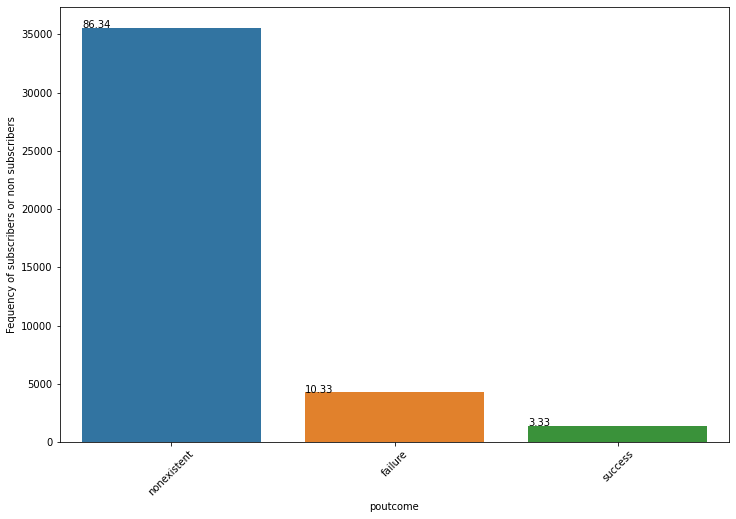

In [43]:
bar_graph('poutcome')

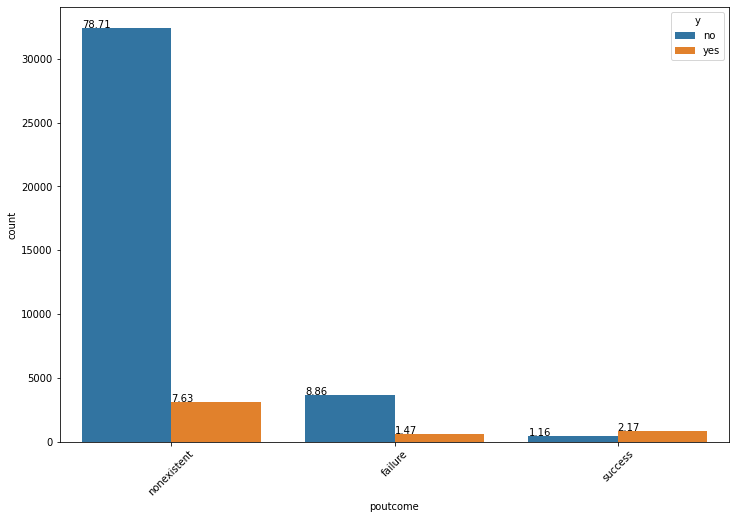

In [44]:
compare_bar_graph('poutcome')

####Age

In [45]:
bank_data["age"].value_counts()

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

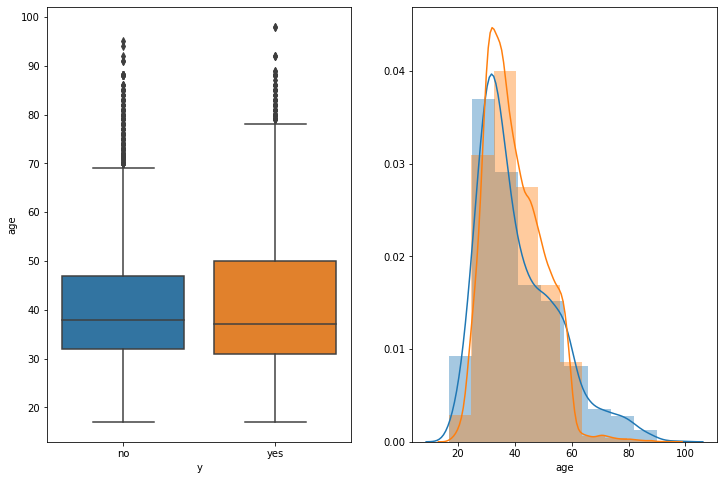

In [46]:
continous_graph('age')

####Duration

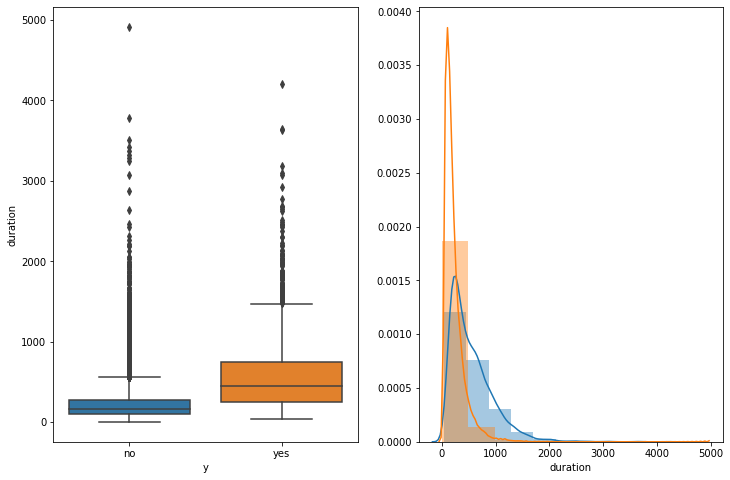

In [47]:
continous_graph('duration')

####Campaign

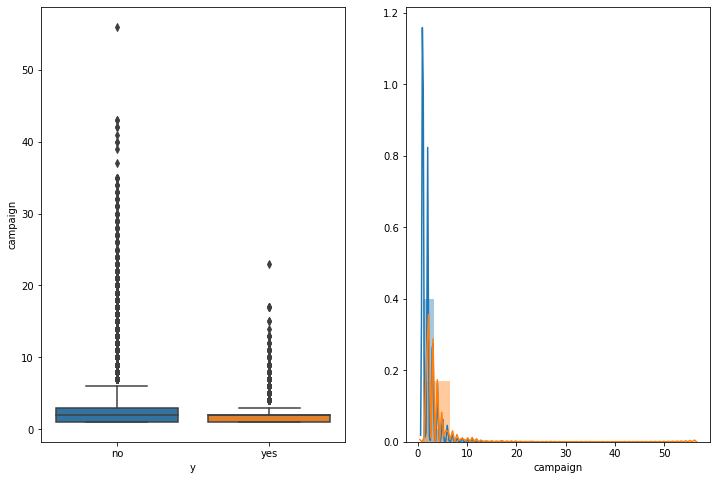

In [48]:
continous_graph('campaign')

####Pdays

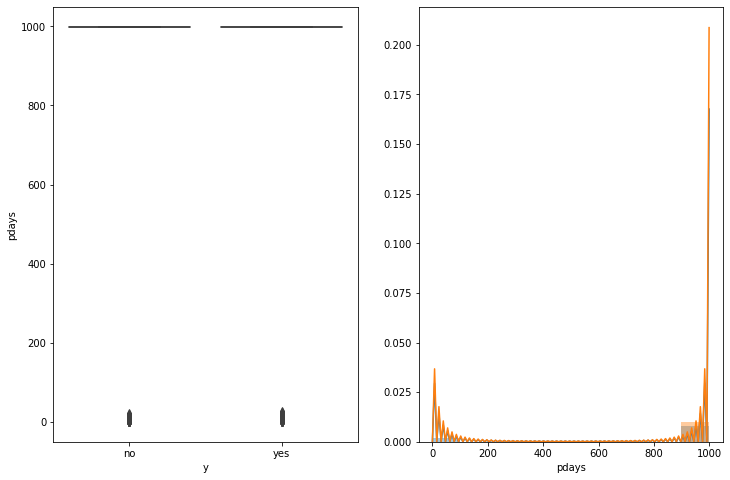

In [49]:
continous_graph('pdays')

####Previous

In [50]:
bank_data['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

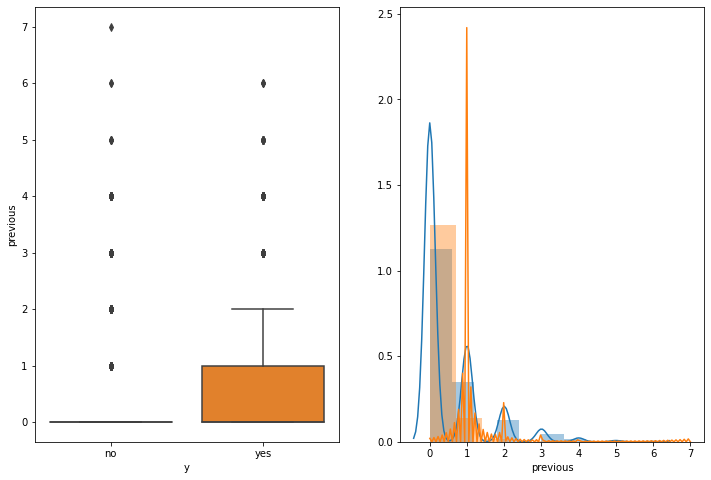

In [51]:
continous_graph('previous')

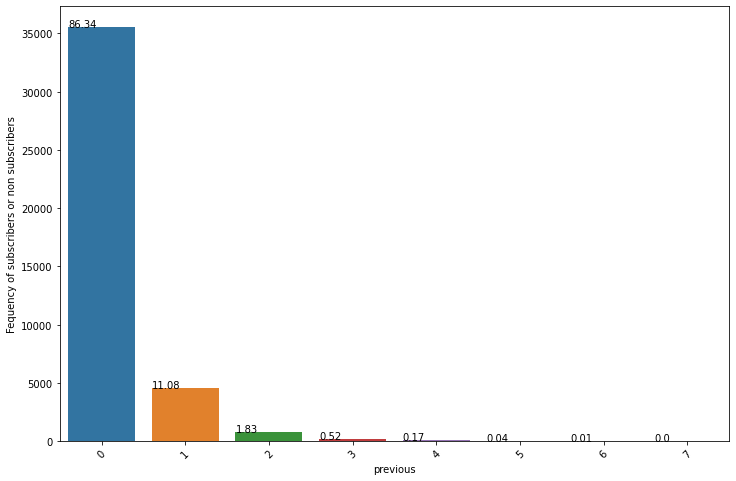

In [52]:
bar_graph('previous')

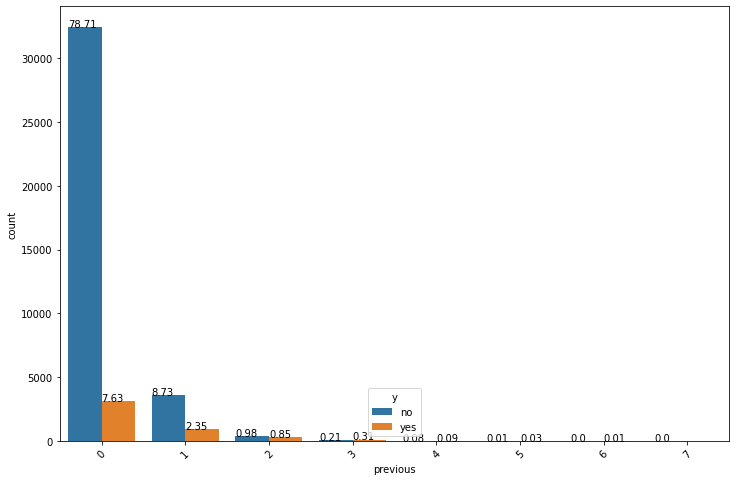

In [53]:
compare_bar_graph('previous')

####emp.var.rate

In [54]:
bank_data["emp.var.rate"].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

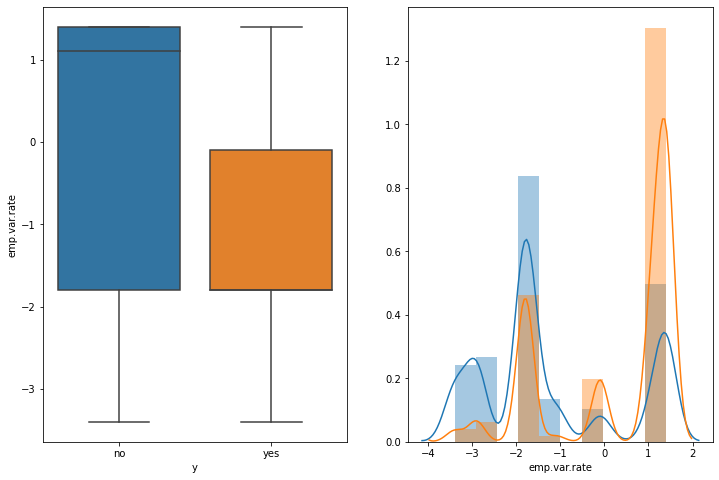

In [55]:
continous_graph('emp.var.rate')

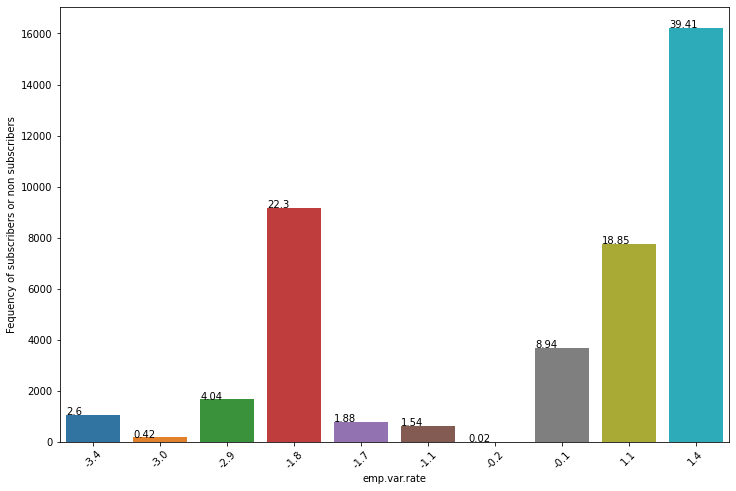

In [56]:
bar_graph('emp.var.rate')

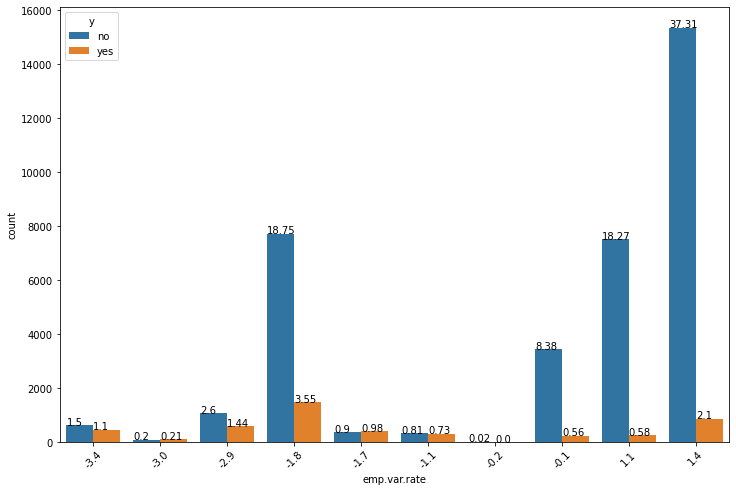

In [57]:
compare_bar_graph('emp.var.rate')

####cons.price.idx

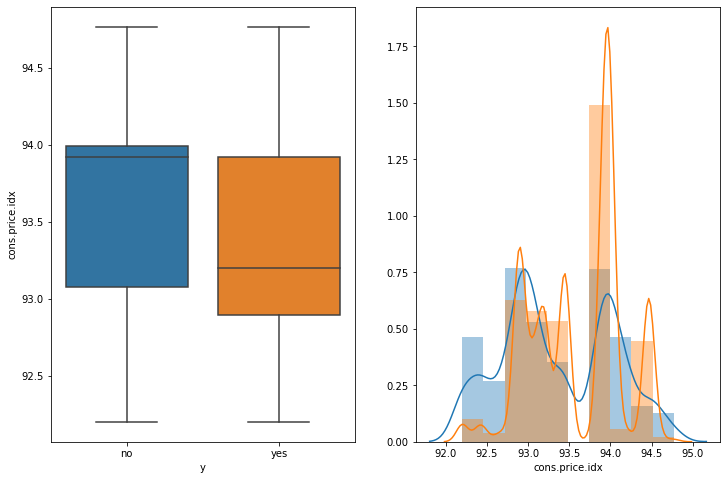

In [58]:
continous_graph('cons.price.idx')

####cons.conf.idx

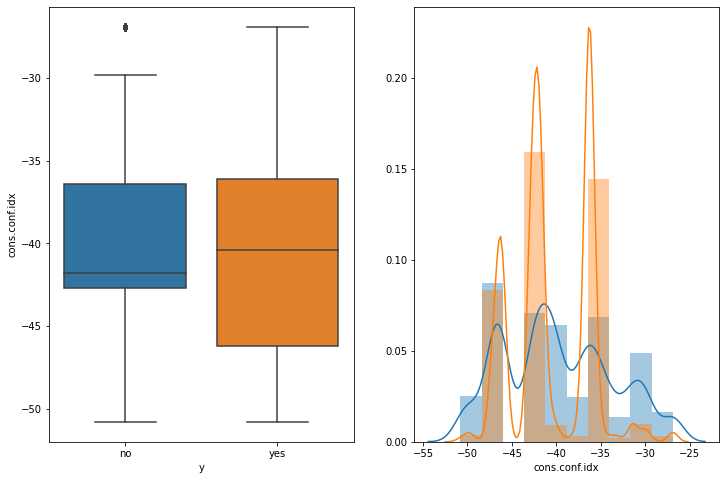

In [59]:
continous_graph('cons.conf.idx')

####euribor3m

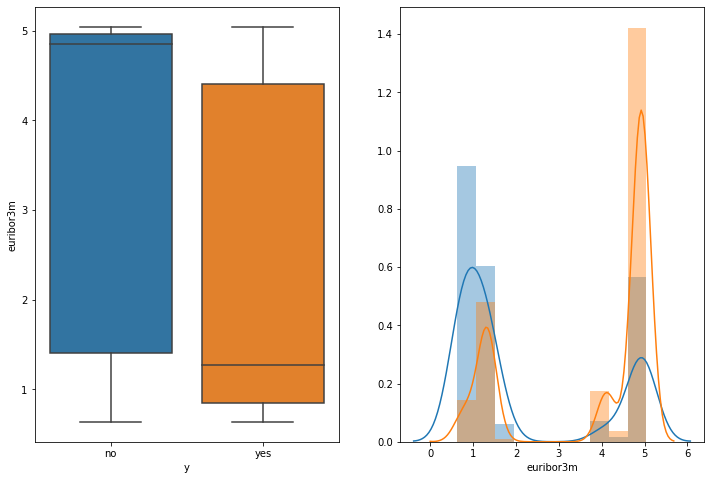

In [60]:
continous_graph('euribor3m')

####nr.employed

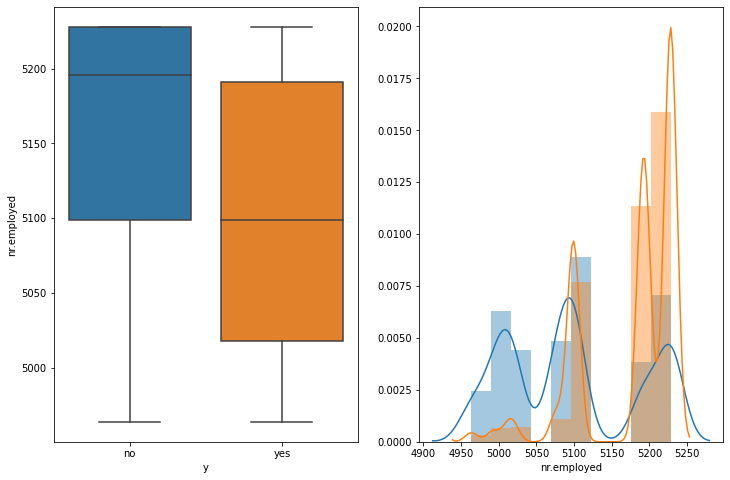

In [61]:
continous_graph('nr.employed')

###Correlations

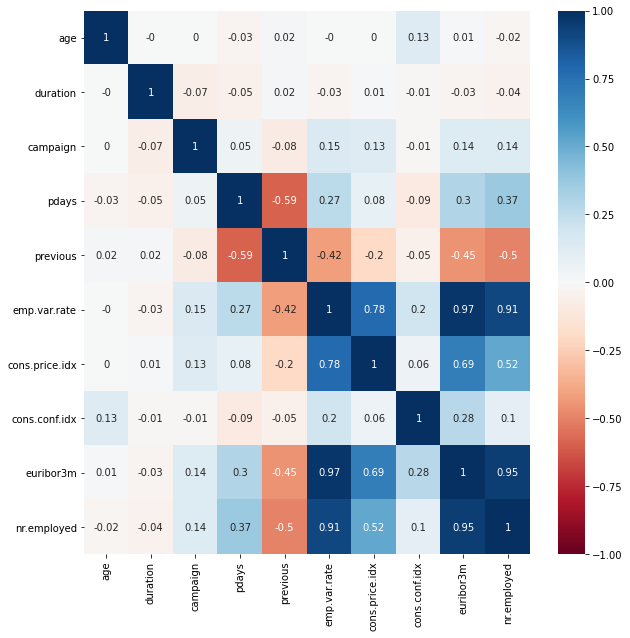

In [62]:
plt.figure(figsize=(10,10))
sb.heatmap(bank_data.corr().round(2),
            cmap='RdBu', vmin=-1.0,
            annot=True)

##PreProcesssing

In [63]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [0]:
bank_data_dummies=pd.get_dummies(bank_data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [65]:
bank_data_dummies.shape

(41176, 64)

In [66]:
bank_data_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [0]:
bank_data_dummies=bank_data_dummies.drop('y', axis=1)
x=bank_data_dummies
y=bank_data['y']

In [68]:
x.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [69]:
y.replace({"no":0, "yes":1}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


###Feature Selection

[7.46562964e-02 2.22030573e-01 5.48012387e-02 3.20117511e-02
 1.08225193e-02 2.46503140e-02 1.37180627e-02 1.80167221e-02
 7.76509948e-02 3.43467892e-02 1.47968918e-02 9.96447234e-03
 4.85757580e-03 3.74960438e-03 8.26097886e-03 7.50151046e-03
 5.18898963e-03 7.42193087e-03 5.46136668e-03 1.20842803e-02
 4.74396921e-03 2.13312649e-03 9.22922109e-03 1.41812533e-02
 1.27220681e-02 6.84023506e-04 7.23328219e-03 5.36331241e-03
 9.32132866e-03 1.34066733e-02 2.47510105e-04 1.01574824e-02
 1.36659431e-02 6.27717514e-03 5.97813995e-03 6.03464620e-03
 8.84991721e-07 1.67080185e-02 2.17289415e-03 1.63775549e-02
 1.15062339e-02 2.16898827e-03 1.11029636e-02 6.72653816e-03
 7.75303997e-03 4.48830422e-03 3.05163356e-03 1.28081373e-03
 3.34797889e-03 4.36089549e-03 7.23755422e-03 1.16901855e-02
 3.37751540e-03 6.65212212e-03 3.21243618e-03 1.22526656e-02
 1.32343622e-02 1.32678135e-02 1.26982938e-02 1.28104843e-02
 7.65753857e-03 1.01035626e-02 3.13867067e-02]


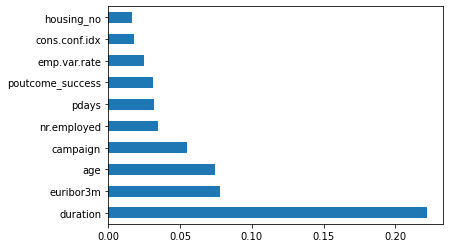

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
x=x[['housing_no','cons.conf.idx','emp.var.rate','poutcome_success','nr.employed','pdays','campaign','euribor3m','age','duration']]

In [72]:
x.shape

(41176, 10)

In [0]:
x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, test_size=0.2)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2)

In [74]:
print("x train: ",x_train.shape)
print("y train: ",y_train.shape)
print("x test: ",x_test.shape)
print("y test: ",y_test.shape)
print("x val: ",x_val.shape)
print("y val: ",y_val.shape)
#log and knn uses test 

x train:  (32940, 10)
y train:  (32940,)
x test:  (8236, 10)
y test:  (8236,)
x val:  (6588, 10)
y val:  (6588,)


##Models

###Logistic

In [0]:
scaler=StandardScaler()

scaler.fit(x_train)
x_train_scale=scaler.transform(x_train)
# x_val_scale=scaler.transform(x_val)

In [76]:
LogReg=LogisticRegression(penalty = 'none', 
                          solver = 'lbfgs', 
                          class_weight = 'balanced', 
                          verbose = 1)

LogReg.fit(x_train_scale, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=1, warm_start=False)

In [77]:
print(LogReg.intercept_)

[-1.34749957]


In [78]:
LogPred=LogReg.predict(x_test)
LogPred

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
LogReg.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [80]:
score = LogReg.score(x_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.8872025254978144


In [81]:
print(classification_report(y_test, LogPred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7306
           1       1.00      0.00      0.00       930

    accuracy                           0.89      8236
   macro avg       0.94      0.50      0.47      8236
weighted avg       0.90      0.89      0.83      8236



In [104]:
print(classification_report(y_train, LogReg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29207
           1       1.00      0.00      0.00      3733

    accuracy                           0.89     32940
   macro avg       0.94      0.50      0.47     32940
weighted avg       0.90      0.89      0.83     32940



In [82]:
confusion_matrix(y_train,LogReg.predict(x_train))

array([[29229,     2],
       [ 3709,     0]])

###KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, test_size=0.2)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2)

In [0]:
scaler_knn=MinMaxScaler()
scaler_knn.fit(x_train)

knn = KNeighborsClassifier(n_neighbors=5)

x_knn_train_scale=knn.fit(x_train,y_train)

In [0]:
y_pred = knn.predict(x_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7330
           1       0.55      0.47      0.51       906

    accuracy                           0.90      8236
   macro avg       0.74      0.71      0.73      8236
weighted avg       0.89      0.90      0.90      8236



In [100]:
print(classification_report(y_train, knn.predict(x_train)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     29207
           1       0.74      0.62      0.67      3733

    accuracy                           0.93     32940
   macro avg       0.85      0.79      0.82     32940
weighted avg       0.93      0.93      0.93     32940



In [91]:
confusion_matrix(y_train,knn.predict(x_train))

array([[28410,   797],
       [ 1432,  2301]])

In [103]:
knn.score(x_train,y_train)

0.9323315118397085

###Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [94]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [95]:
print(classification_report(y_test, decision_tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7330
           1       0.49      0.51      0.50       906

    accuracy                           0.89      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       0.89      0.89      0.89      8236



In [96]:
confusion_matrix(y_train,decision_tree.predict(x_train))

array([[29207,     0],
       [    3,  3730]])

In [0]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [0]:
dot_data=StringIO()
export_graphviz(decision_tree,
                feature_names=x_train.columns,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True)

In [0]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<nr.employed &le; 5087.65<br/>gini = 0.198<br/>samples = 32940<br/>value = [29265, 3675]>, fillcolor="#e89152"] ;\n1 [label=<duration &le; 172.5<br/>gini = 0.494<br/>samples = 3920<br/>value = [2174, 1746]>, fillcolor="#fae6d8"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<pdays &le; 16.5<br/>gini = 0.282<br/>samples = 1482<br/>value = [1230, 252]>, fillcolor="#ea9b62"] ;\n1 -> 2 ;\n3 [label=<duration &le; 164.5<br/>gini = 0.477<br/>samples = 259<br/>value = [157, 102]>, fillcolor="#f6d3ba"] ;\n2 -> 3 ;\n4 [label=<duration &le; 129.5<br/>gini = 0.456<br/>samples = 236<br/>value = [153, 83]>, fillcolor="#f3c5a4"] ;\n3 -> 4 ;\n5 [label=<pdays &le; 3.5<br/>gini = 0.388<br/>samples = 133<br/>value = [98, 35]>, fillcolor="#eeae80"] ;\n4 -> 5 ;\n6 [label=<euribor3m &le; 0.715<br/>gini = 0.489<br/>samples = 54<br/>value = [31, 23

In [0]:
from IPython.display import Image

In [0]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image (graph.create_png())

#Conclusions

The accuracy of all the models are very close to one another.
The top 10 features of the dataset that was selected are 
- housing_yes
- cons.conf.idx
- emp.var.rate
- poutcome_success
- pdays
- nr.employed
- campaign
- age
- euribor3m
- duration

Other Insights generated from this is that the number of clients that were last contacted was from May followed by July and August. Whereas on the other hand, the months during Winter are very low.


##suggestions and Problems

Change increase the number of features from the feature selections to see if the models has changed to see which ones are better. Another problem with the pdays is that the clients who were not previous contacted had a value of 999 which scewed the data to the right heavily. That was a mistake that was missed. 